In [1]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

## Ejercicio 1
Imprime por pantalla tu nombre, apellido y email

In [2]:
# Resuelve en esta celda el ejercicio 1
print("Ángel Roman Osma - romanosma@gmail.com")

Ángel Roman Osma - romanosma@gmail.com


## Ejercicio 2

### Ejercicio 2.1
Muestra los primeros registros del siguiente conjunto de datos

In [3]:
# Cargar el dataset "titanic" de seaborn
df = sns.load_dataset("titanic")

# Resolver aqui el ejercicio 2.1
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Ejercicio 2.2
Muestra una descripción general del conjunto de datos cargado en el ejercicio 2.1

In [4]:
# Resuelve aqui el ejercicio 2.2
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### Ejercicio 2.3
Elimina los datos de la columna "deck" y sustituye los datos nulos para la columno "age" con el valor medio. Luego muestra el dataframe:

In [5]:
# Resuelve aqui el ejercicio 2.3
df = df.drop(columns=['deck'])
media_edad = df['age'].mean()
df['age'] = df['age'].fillna(media_edad)
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


#### Ejercicio 2.4
Crea un gráfico de tipo histograma que represente la distribución de las edades de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

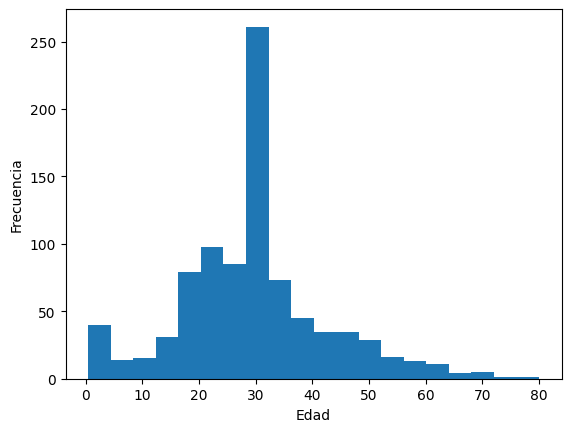

In [6]:
# Resuelve aqui el ejercicio 2.4
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

#### Ejercicio 2.5
Crea un gráfico circular que represente la distribución por género de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

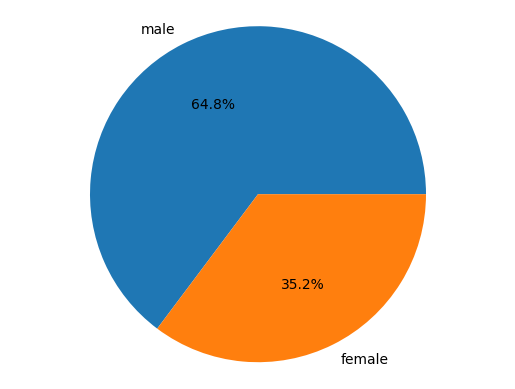

In [7]:
# Resuelve aqui el ejercicio 2.5
genero_counts = df['sex'].value_counts()
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Ejercicio 3

#### Ejercicio 3.1
Separa el dataset en dos variables, 'x' e 'y'.
 - La variable 'x' debe incluir las columnas 'depth', 'table', 'price', 'x', 'y' y 'z'.
 - La variable 'y' debe incluir la columna 'carat'.

In [8]:
# Carga el dataset "diamonds" de seaborn
diamantes = sns.load_dataset("diamonds")
diamantes.head()

# Resuelve aqui el ejercicio 3.1
x = diamantes[['depth', 'table', 'price', 'x', 'y', 'z']]
y = diamantes['carat']

#### Ejercicio 3.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [9]:
# Resuelve aqui el ejercicio 3.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

#### Ejercicio 3.3
Crea un modelo de regresión lineal y entrenalo con los conjuntos de datos separados en el ejercicio anterior. La variable objetivo corresponde a la columna 'carat'

In [10]:
# Resuelve aqui el ejercicio 3.3
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

#### Ejercicio 3.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la columna 'carat'

In [11]:
# Resuelve aqui el ejercicio 3.4
y_pred = modelo.predict(x_test)

### Ejercicio 4

#### Ejercicio 4.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [12]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ALTERNATIVA CON OTRO DATASET 
# Cargar el dataset "titanic" de seaborn
# df = sns.load_dataset("titanic")

# Resuelve aqui el ejercicio 4.1
print(X.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

#### Ejercicio 4.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [13]:
# Resuelve aqui el ejercicio 4.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### Ejercicio 4.3
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [14]:
# Resuelve aqui el ejercicio 4.3
modelo_log = LogisticRegression(max_iter=2000)
modelo_log.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

#### Ejercicio 4.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [15]:
# Resuelve aqui el ejercicio 4.4
y_pred_log = modelo_log.predict(X_test)

### Ejercicio 5

#### Ejercicio 5.1
Muestra los primeros registros del siguiente conjunto de datos

In [16]:
df = sns.load_dataset("penguins")
# Resuelve aqui el ejercicio 5.1
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


#### Ejercicio 5.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. La variable objetivo corresponde a la columna "species

In [17]:
# Resuelve aquí el ejericio 5.2
# Eliminar filas con valores nulos
df = df.dropna()

# Separar características y variable objetivo
X_peng = df.drop('species', axis=1)
y_peng = df['species']

# Convertir variables categóricas a numéricas
X_peng = pd.get_dummies(X_peng, drop_first=True)

# Dividir en conjuntos de entrenamiento y prueba
X_train_peng, X_test_peng, y_train_peng, y_test_peng = train_test_split(X_peng, y_peng, test_size=0.4, random_state=42)

#### Ejercicio 5.3
Elige un modelo de clasificación entre los siguientes: 
 - Decision tree (Árbol de decisión)
 - Random forest
 - SVM (Support Vector Machine)
 
Entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [18]:
# Resuelve aquí el ejericio 5.3
from sklearn.ensemble import RandomForestClassifier

# Elegimos Random Forest como modelo de clasificación
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_peng, y_train_peng)

RandomForestClassifier(random_state=42)

#### Ejercicio 5.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [19]:
# Resuelve aquí el ejericio 5.4
y_pred_peng = modelo_rf.predict(X_test_peng)

### Ejercicio 6

#### Ejercicio 6.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [20]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
df = pd.read_csv(url, header=None)
df.columns = [
   "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
df = df.drop("Sex", axis=1)

# Resuelve aqui el ejercicio 6.1
print(df.describe())

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

#### Ejercicio 6.2
Separa el conjunto de datos en variables 'x' e 'y', donde la 'y' corresponde a la variable objetivo 'Sex'.

In [21]:
# Resuelve aqui el ejercicio 6.2
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
df_abalone = pd.read_csv(url, header=None)
df_abalone.columns = [
   "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

X_abalone = df_abalone.drop("Sex", axis=1)
y_abalone = df_abalone["Sex"]

#### Ejercicio 6.3
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. 

In [22]:
# Resuelve aquí el ejercicio 6.3
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X_abalone, y_abalone, test_size=0.4, random_state=42)

#### Ejercicio 6.4
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. Utiliza el valor 3 para el parámetro 'n_neighbors'

In [23]:
# Resuelve aquí el ejercicio 6.4
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train_ab, y_train_ab)

KNeighborsClassifier(n_neighbors=3)

#### Ejercicio 6.5
Muestra la matriz de confusión resultante para la salida del ejercicio anterior

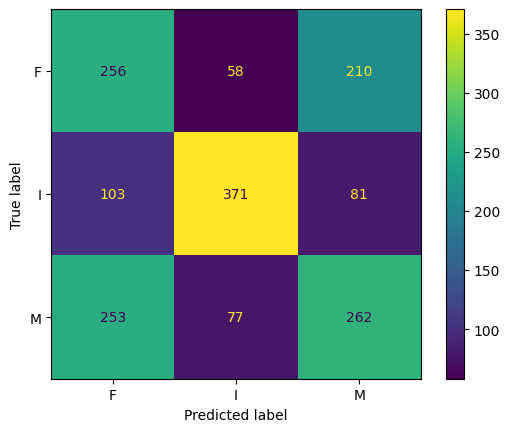

In [24]:
# Resuelve aquí el ejercicio 6.5
y_pred_ab = modelo_knn.predict(X_test_ab)
cm = confusion_matrix(y_test_ab, y_pred_ab)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_knn.classes_)
disp.plot()
plt.show()